# 東森新聞雲爬蟲練習
## 練習從東森新聞雲網站中，爬取新聞摘要及詳細內容。
## 學習利用Selenium模擬人為操作，更新動態網頁後爬取新聞內容。

In [1]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 以財經新聞為例，先連結到財經新聞網頁，複製其URL。

In [2]:
ETtoday_url = "https://www.ettoday.net/news/focus/%E8%B2%A1%E7%B6%93/"  #財經新聞

### 用Selenium打開一個瀏覽器，連結到網站。然後模擬下拉網頁的動作，讓網頁完成更新，再處理後續動作。

In [3]:
browser = webdriver.Chrome()
browser.get(ETtoday_url)  # 打開瀏覽器並連到東森新聞雲網頁

SCROLL_PAUSE_TIME = 1

#
# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#
last_height = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
while True:
    '''
    Your code here
    
    提示：可參考以下的Stack Overflow: 
    https://stackoverflow.com/questions/48850974/selenium-scroll-to-end-of-page-indynamically-loading-webpage/48851166
    '''

    browser.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(2) 
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break 
    last_height = new_height

網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
到達頁面底端


### 到這裡網頁已經更新完畢，所有的新聞都已經出現在網頁上。接下來做爬取收集新聞的動作。

In [4]:
#
# 這裡先建立一個函數，其功能是連到外部連結，並爬取新聞內容。
#
def getNewsDetailContent(link_url):
    resp = requests.get(link_url)
    resp.encoding = 'utf-8'
    #print(resp.text)

    soup = BeautifulSoup(resp.text, 'lxml')
    news_content = soup.find("div", attrs={'class':'story'}).find_all("p")
    for p in news_content:
        """
        .string屬性說明：
        (1) 若當前tag節點底下沒有其他tag子節點，會直接抓取內容(返回"NavigableString")
        (2) 若當前tag節點底下只有唯一的一個tag子節點，也會直接抓取tag子節點的內容(返回"NavigableString")
        (3) 但若當前tag節點底下還有很多個tag子節點，.string就無法判斷，(返回"None")
        """
        if ((p.string) is not None):
            print(p.string)

### 解析HTML並萃取新聞摘要，若有外部的連結，再連到外部連結並把詳細新聞內容抓取下來。

In [5]:
# 爬取網頁內容，解析後萃取新聞摘要
html = browser.page_source
soup = BeautifulSoup(html, "lxml")
all_news = soup.find("div", attrs={'class':'block block_1 infinite_scroll'})

news_block = all_news.find_all('div', attrs={'class':'piece clearfix'})

for i, news_item in enumerate(news_block):
    print("----------------------------------------------------------------------")
    news_body = news_item.find('h3')
    print("\n[%d] %s\n" % (i, news_body.a.string))
    
    # 
    # 連到外部連結，擷取詳細新聞內容
    #
    externalLink = "https://www.ettoday.net" + news_body.a["href"]
    getNewsDetailContent(externalLink)


----------------------------------------------------------------------

[0] 保險卓越獎／新光人壽打造多元專案　一口氣囊括6項大獎

▲新光人壽李紀珠副董事長（右）出席第8屆台灣保險卓越獎頒獎典禮，代表新光人壽接受金管會主委顧立雄（左）頒發「公益關懷卓越獎」。（圖／新光人壽提供）
記者紀佳妘／台北報導
財團法人保險事業發展中心主辦、被譽為保險業界國家級獎項的「台灣保險卓越獎」，新光人壽憑著深耕專業及持續創新的優異表現，拿下6項大獎，新光人壽副董事長李紀珠代表領獎時，感謝評審及各界對新光的肯定。
新光人壽這次奪下「公益關懷卓越獎」銀質獎、「微型保險推展卓越獎」銀質獎、「保戶服務專案企畫卓越獎」銀質獎、「資訊應用卓越獎」銀質獎、「人才培訓卓越獎」銀質獎，以及「保險業加薪優良標竿企業」6項大獎。
新光人壽配合政府推動全民健康，引領運動風潮，舉辦各類大型賽事，並每年號召全國捐血活動，儲備醫療救援能量；長期關心銀髮高齡議題，結合新光關係企業資源，構築樂齡生活新典範「新光新板傑仕堡」；應用創新科技，致力打造綠色金融，同時倡導友善農業，推動生態保育，讓企業與自然生態能永續發展。
此外，整合企業與學術資源，積極推動產學合作，達到學生、學校、企業三贏的成果；提供急難救助、照顧員警遺眷生活，秉持「需要在哪裡，新光的服務就到哪裡」的精神，具體落實各個面向的企業社會責任，長期努力榮獲「公益關懷卓越獎」銀質獎。
微型保險向來有「銅板保單」之稱，保費低廉、投保便利，核保與理賠的程序相對簡單，適合經濟條件不好的民眾。新光人壽長期關懷社會公益，多年來持續與各縣市政府合作，響應政策全力推動微型保險，發揚保險精神，擴大保護傘，提供弱勢民眾基本保障，自2014年開辦至2018年止，累計投保人數近10萬人，捐贈人數逾5萬人，榮獲「微型保險推展卓越獎」銀質獎。
數位科技的進步改變民眾生活型態，因應數位時代來臨，新光人壽於2017年啟動「大智移雲，從心出發」專案，運用保險科技，從客戶習慣、客戶體驗、客戶關注、客戶關係、客戶時間思考創新服務流程，深化與客戶間之互動連結。AI智能客服「小新」24小時不間斷服務，提升客戶有感體驗；業界首創線上身分驗證會員升級，創新服務驗證方式，實現金融科技不受時間地點限制的優勢；「數位帳單e管家」提供一次查足

----------------------------------------------------------------------

[8] 為5G而生！高通推Wi-Fi 6　Networking Pro與車用晶片

▲高通推四大Networking Pro系列平台，圖點開放大。（圖／翻攝自高通官網）
記者周康玉／台北報導
高通（Qualcomm）今（28）日發表Networking Pro系列平台，專為高密度網路量身設計，可搭載於數百個終端裝置中，邁向全面實現Wi-Fi 6；同時推出Wi-Fi 6車用晶片QCA6696，此晶片現已送樣，預計2021年上市。
高通於舊金山舉辦Wi-Fi 6活動日展出四大Networking Pro系列平台，並依據應用規模、以及運算能力，分成1200、800、600、400等四種規格。
高通技術公司副總裁暨無線基礎設施與連網業務總經理Nick Kucharewski表示，Wi-Fi 6因應終端各種複雜與變異的資料需求，可以支援不斷大幅增加的連網裝置，是迎接5G的重大突破。
此外，高通在汽車領域推動Wi-Fi 6，其QCA6696晶片，可支援十億位元等級車內熱點，同時在多個螢幕上支援超高解析度（ultra-HD）影片串流，在相容裝置與倒車顯影攝影機上同步螢幕，以及支援藍牙5.1和高通RaptXTM可調節音訊，此晶片現已送樣，預計2021年出現在商用車輛。
▼高通實現Wi-Fi 6，推Networking Pro與車用晶片。（圖／取自高通網站）
----------------------------------------------------------------------

[9] 台灣人像是自己土地上的異鄉人！鄭麗君：重建藝術史也是重建心靈

記者林育綾／台中報導
▲鄭麗君(右1)形容「台灣人像是自己故鄉的異鄉人」，將努力重建台灣藝術史。（圖／鄭麗君臉書）
▲台灣藝術家洪瑞麟在1960年的作品《礦工頌》。（圖／文化部提供） 
大多人對西洋藝術史都有一定的瞭解，例如歐洲有米勒畫農人，卻很少人知道台灣本土藝術家洪瑞麟，有許多描繪礦工、工人的精彩作品。鄭麗君提到，當時她接任文化部長那一刻開始，就不停思考，「我們該怎麼做，才能讓台灣人重新去認識自己？」
▲有「台灣科學中藥之父」之稱的許鴻源博士，受教友廖繼春的鼓勵，展開台灣

▲期交所表示未來將上市美國斯達克100期貨、富櫃200指數期貨。（圖／記者余弦妙攝）
記者余弦妙／台北報導
期交所宣布，美國那斯達克100期貨(UNF)及櫃買中心富櫃200指數期貨(G2F)，即將在9月30日上市。
期交所指出，那斯達克100期貨推出後，期交所為美國境外第一家掛牌那斯達克100期貨，也是除美國外同時掛牌美國道瓊期貨、標普500期貨及那斯達克100期貨三項商品之交易所，提供交易人無需承擔匯率風險，可享一站式購足之服務，並滿足三商品間價差及策略需求。此外，那斯達克100期貨及富櫃200期貨皆可作為相關權證、ETN及ETF等現貨發行業者及交易人避險及套利管道。
----------------------------------------------------------------------

[21] 保險卓越獎／中國人壽資訊安全、人才培訓獲2獎　首批取得個資管理認證

▲中國人壽副總經理宋健榮（右）接受保險局長施瓊華頒獎表揚。（圖／中國人壽提供）
記者楊絡懸／台北報導
財團法人保險事業發展中心主辦第8屆「台灣保險卓越獎」28日結果出爐，中國人壽獲得「資訊安全推展卓越獎」金質獎及「人才培訓專案企畫卓越獎」銀質獎殊榮，中國人壽表示，堅持專業、長期重視人才培育，將持續推動轉型創新。
中國人壽總經理黃淑芬表示，當金融消費型態從實體位移到數位，優質金融服務奠基於安全無虞的環境，此次獲「資訊安全推展卓越獎」金質獎是對中國人壽致力提供安全金融保險服務之決心及客戶資料安全保護承諾的最大肯定。
黃淑芬表示，中國人壽以最高標準自我要求，強化個資保護管理能力及建置各項安全防護措施，成立專責「資訊安全部」，規劃整體資訊安全藍圖。
中國人壽取得ISO 27001國際標準認證，並於2018年擴大驗證範圍通過重新審查；導入BS10012並接軌國際最新標準，預先納入歐盟標準的個人資料保護規則（European Union General Data Protection Regulation, GDPR）的要求，以「零缺失」通過BS10012:2017標準認證，是台灣首批取得新版個資管理制度認證的壽險公司。
「中國人壽重視人才的養成及培育，建構完善的教育訓練制度。」黃淑芬指出，從職能精進培訓到實作輔導，系統化的延伸銜接，結合中國人壽獨家開發的i-Agent數位管理輔銷工具，以行

▲國泰人壽董事長黃調貴（右）獲金管會主委顧立雄頒發2019保險卓越獎「終身成就卓越獎」。（圖／記者楊絡懸攝）
記者楊絡懸／台北報導
被譽為保險業界國家重量級獎項的「台灣保險卓越獎」28日舉行頒獎典禮，國泰人壽董事長黃調貴獲頒終身成就卓越獎，他表示，自己從1973年進入國泰人壽，貴人不斷，這個獎項是給國泰金控董事長蔡宏圖與國泰人壽所有成員；他也哽咽表示，謝謝家人支持他的「工作優先」，這一優先就是46年。
「我在每一個階段，都有貴人相助。我能力不是很好，但也因為有貴人相助。」黃調貴獲金管會主委顧立雄頒發「終身成就卓越獎」後致詞表示，他在1973年研究所畢業時，已經取得東吳大學講師及國泰人壽辦事員的工作。大學講師的薪水較高，形象更好，但論文指導老師堅持要他去國泰人壽，走出不一樣的路，「辦事員薪水比較低，形象又比較不好，沒想到這一待就是46年。」
「論文是老師指導，但我忙著交女朋友，負責打報告和整理而已，還好我不選市長或總統，但希望這次競選壽險公會理事長的對手不要拿這個來打我。」黃調貴從玩笑話轉為正經說道，自己會走上壽險業這條路，指導教授是第一位貴人。
進入了國泰人壽以後，黃調貴在數理企劃部門接下了統計科科長，這部門有7個人，最後這7人團隊中，他後來當上了國泰人壽董事長，另外是國泰人壽副董事長熊明河、國泰人壽總經理吳明洋，以及國泰人壽二位副總經理蔡漢章與李永振；也就是說，7人團隊中，有5個人是副總經理以上，「每個人的能力都比我好、學歷比我高，這些人都是我的貴人。」
▲國泰人壽董事長黃調貴。（圖／記者楊絡懸攝）
黃調貴第二階段進入國泰人壽業務部門，他說，當時的貴人就是前國泰人壽總經理張發得和蔡漢章；到了第三階段，黃調貴調到投資部門，一開始他對投資完全不懂，貴人就是國泰人壽現任總經理劉上旗與國泰金控總經理李長庚。
「我在這邊要特別感謝國泰人壽，這個獎是國泰人壽的。」黃調貴表示，因為在國泰人壽才能給他這麼大的學習和發揮空間，這個獎項是國泰金控董事長蔡宏圖與國泰人壽所有成員。最後，他哽咽表示，他要感謝家人的包容，工作一忙，很少時間陪伴家人，但家人始終支持「工作優先」，這一優先，至今已經46年了，「對不起我的家人。」
黃調貴也鼓勵在場的保險業務人員。他說，這個產業是「值得待的」，否則他不會一待就是46年；而從事壽險業有3大功德，一是提供保戶保障，二是每增員一個人，每個人背後代表著一個

▲高雄大社工業區降編案送至內政部待審，經濟部長沈榮津今（28）日表示，經濟部將在會議中轉達工業區廠商的期待。（圖／記者季相儒攝）
記者林淑慧／台北報導
高雄大社工業區降編案送至內政部待審，經濟部長沈榮津今（28）日表示，經濟部會從產業角度出發，在跨部會會議中轉達工業區廠商的期待，也會為業者爭取調適空間以利升級轉型。
高雄石化工業區林立，轉型高值化成為地方的訴求，高雄市政府都委會決議將大社工業區降編，報至內政部都市計畫委員會審議，但因牽涉一年高達800至900億的石化產值，內政部都委會尚未做出最後決策。
經濟部日前發布新聞稿指出，大社工業區若變更為乙種工業區，只容許公害輕微行業，且除修建外無法新建、增建及改建，相對降低產業競爭力，環保改善及高值化發展無法繼續進行，並可能使國內高科技材料供應斷鏈。
官員指出，國內任何一項產業新增投資，都希望朝高值化發展，近年經濟部很認真推動此事，因台灣沒有太多的條件做量的競爭，目前有些高值化項目已在推進中，只是未大到足以改變現況。
經濟部表示，理解居民對環境改善的殷切需求，將尊重內政部對降編案審議的結果，更希望有兼顧環保、產業發展、就業及保障健康的方案；更多的對話與合作，對高雄的發展會更有幫助。
----------------------------------------------------------------------

[45] 勞動部：博士畢業生找工作最快　平均只要半個月

▲勞動部指出，博士畢業生找工作最快。（圖／pakutaso）
記者余弦妙／台北報導
勞動部今（28）日公布大專畢業生就業情況統計，近5年（103年至107年）大專畢業生共計153.5萬人，截至108年4月底，扣除出境、純在學、服役及死亡者後，可進入勞動市場就業者(簡稱為可工作人口)為133.9萬人，其中已投公、農、勞保者為110.2萬人，投保率達82.3%；另外，107年度大專畢業生找到第一份工作要花1.4個月。
勞動部指出，為提升薪資透明度及掌握大專畢業生就業情況，自民國99年起就開始建立建構統計數據網絡，為的就是希望可以主動掌握畢業生的就業情況，根據最新一期的的數據顯示，近5年大專畢業生共計153.3萬人，截至今年4月底，從勞保局的資料中顯示，投保率已達82.3%；其中107年度畢業者投保率為72.6%，103年畢業生已達87.3%。
勞動部

▲國人以複委託投資的有價證券，向券商融通資金再投資海外，預估年底前上路。（圖／記者紀佳妘攝）
記者紀佳妘／台北報導
金管會今（27）日針對券商公會提出3大建議案進行回應，首先是外資可用海外有價證券或外幣，向券商擔保借新台幣再投資，擬將放行；再者是開放分帳戶50%的資金，做為證券商融資的來源，已回函給公會再「緩議」；最後是國人以複委託投資的有價證券，向券商融通資金再投資海外，最快今年底開放。
針對外資以持有外國有價證券或外幣作為擔保，向證券商融通新台幣一案，金管會證期局副局長蔡麗玲表示，券商公會在今年7月份來函，初步還在審酌中，原則上公會所提的配套須更周延的考量，包括有價證券的範圍太廣、融通成數高卻沒相關風險機制、融資保證金追繳、違約處理機制等，這部分會請公會進一步研議。
其次，放寬分帳戶50%資金，做證券商融資來源，蔡麗玲指出，考慮到客戶款項運用拿來提供券商，做有價證券融資，這部分不太符合證交法六十條第一項第五款的立法意旨，且考慮到把錢做融資，因交割款客戶分帳戶資金是客戶，做有價證券的交易使用，萬一客戶有大筆投資時，會有資金流動性和風險控管的問題，因為融資後，客戶若有信用風險產生的時候，對風控有所疑慮，因此該案「緩議」。
第三，國人用海外有價證券做擔保，辦理外幣借款，蔡麗玲則說，經洽詢央行意見後原則上同意，也有請公會研議配套措施，到目前為止，公會仍在研擬配套措施，預估年底前可上路。
根據證券商公會統計，截至今年7月底，證券商受託買賣外國有價證券的庫存部位，金額為新台幣3,144.72億元（以市價計）；截至去年同期，庫存部位金額為新台幣3,105.02億元（以市價計）。
----------------------------------------------------------------------

[59] 吸引台半導體人才　美矽智財廠新思科技提供博士獎學金

▲美矽智財大廠新思科技提供博士獎學金。（圖／取自新思科技粉絲團）
記者周康玉／台北報導
看好台灣半導體研發能量，為吸引更多半導體研發人才，美國矽智財大廠新思科技（Synopsys）今（27）日宣布今年起開始提供「新思科技贊助博士級人才培育獎學金」，獎金額度每年每位達新台幣42萬元，即日起至108年9月8日開放申請。
新思科技副總裁暨台灣總經理李明哲指出，人才培育為半導體技術發展的根本，設置才培育獎

▲ 台股盤中逐筆交易將於明年3月23日起實施。（圖／記者劉亮亨攝）
記者李瑞瑾／台北報導
台股將於明（2020）年3月23日起實施盤中全面逐筆交易，為讓投資人在制度上線前了解逐筆交易撮合方式、新式委託種類（如：市價單、立即成交否則取消(IOC)委託、全部成交否則取消(FOK)委託）及資訊揭示之頻率，證交所特別建置「逐筆交易擬真平台」，自擬真平台於今年3月25日啟用以來，使用人次將近百萬人。
證交所逐筆交易擬真交易平台於今年3月25日正式啟用，根據證交所統計，截至8月23日，擬真平台使用人次達98萬6,249戶，活動網頁註冊人數為3萬4331人，符合獎勵資格人次則為84萬8,231戶。
為加強推廣逐筆交易，證交所於今年9月起舉辦「擬真學長姐邀新生拿好禮」獎勵活動，投資人於8月31日前在擬真平台網頁註冊，且曾符合擬真學長姐獎勵資格者，於9月1日至30日期間每邀請一名新生註冊、輸入推薦碼並完成擬真平台體驗後，擬真學長姐即可獲得25元超商購物金（以3名限）。
證交所表示，9月份註冊並完成體驗之新生，亦可額外獲得50元超商購物金之抽獎機會（預計抽出15,000名）。證交所並提醒，投資人在8月31日前於擬真平台網頁註冊，且任一交易日當日完成3筆新式委託，才符合學長姐資格。
此外，為推廣逐筆交易，證交所預計將舉行42場投資講座，截至8月23日已舉辦29場次。
----------------------------------------------------------------------

[71] 台新金搶攻境外資金匯回商機　投資長領軍打團體戰

▲台新金今日舉行法人說明會，由金控總經理林維俊親自主持。（圖／記者紀佳妘攝）
記者紀佳妘／台北報導
台新金（2887）今（27）日舉行法人說明會，上半年稅後淨利82億元，年成長5%，每股稅後盈餘0.7元，也較去年同期成長2.9%；在營收表現方面，財富管理、法金聯貸及信用卡等業務表現佳，帶動手續費淨收入年增4.8%，一舉創歷史新高。
台新金今天舉行法說會，由金控總經理林維俊、財務長賴昭吟、投資長簡展穎，以及台新銀行總經理尚瑞強、法人金融事業總處執行長林淑真共同主持。林維俊表示，台新金控今年上半年各項業務表現穩健，核心子公司台新銀行在放款、存款、財富管理、信用卡等主要業務持續穩定成長，其中總放款餘額較去年同期成長8.6%，企業放

▲近期傳出黎智英一次拋售4戶「麗景名苑」豪宅。（圖／記者黃國霖攝） 
記者張菱育／台北報導
壹傳媒集團創辦人黎智英頻頻賣台灣不動產！繼賣掉壹電視、蘋果日報大樓之後，近期傳出其豪宅「麗景名苑」將出售4戶，包括3、8、10、12等樓層，4戶總價達14.3億元。
觀察網路待售物件，8樓及10樓戶含車位分別約224坪，都開價4億2448萬元、12樓戶約224坪，開價4億4403萬元、3樓戶則因面積較小，開價1.41億元，合計4戶共14.3億元。據查，3、8、10、12等樓層，都是由黎智英以香港商羚越有限公司名義，於2011年7月時一次購入。
▲「麗景名苑」委託房仲銷售，此為10樓戶。（圖／翻攝自《591房屋交易網》）
「麗景名苑」位於大安區新生南路二段，由頂高建設投資興建，共規劃15層樓，總戶數約20戶，2010年預售時每坪開價150~190萬元，因當時尚未有實價登錄，外傳黎智英以每坪140至150萬買入2、3、4、8、10、11、12樓等7戶。
黎智英在2002年來台發展媒體業，對不動產投資也有涉略，包括大量購買內湖區重劃區土地、自建辦公大樓給蘋果日報、壹週刊、壹電視等使用，並且還以投資公司名義購買「麗景名苑」、「仁愛吾疆」等豪宅。
根據實價登錄資料顯示，目前「麗景名苑」僅有1筆成交紀錄，2014年9樓戶以總價2.9億元成交，扣除車位每坪單價為171萬元。至於目前求售的4戶，扣除車位後，3樓每坪約210萬元，8樓、10樓約254萬元，12樓為266萬元，都高於實價行情。
住商不動產企劃研究室經理徐佳馨指出，黎智英長期投資台灣房產，目光精準，4戶拿出來出售並非首次，開價也近市場開價，推估應是測水溫成分居多。
▲「麗景名苑」委託房仲銷售，此為12樓戶。（圖／翻攝自房仲業者官網）
----------------------------------------------------------------------

[84] 嬌生遭罰180億！謊稱「類鴉片藥物」風險　首家被起訴藥廠…股價不掉反升

記者張方瑀／綜合報導
美國嬌生公司（Johnson & Johnson）因謊稱鴉片類藥物濫用風險，成為第一間被告上法院的藥商，奧克拉荷馬州政府也裁定，嬌生須賠償5億7200萬美元（約新台幣180億元），作為當地藥物防治計畫的資金。儘管罰金遠低於預期，讓嬌生股價反倒上漲2%，嬌生

▲中華電AIoT黑客松決賽開跑。（圖／記者邱倢芯攝）
記者邱倢芯／台北報導
中華電信今（27）日舉辦「2019數位創新應用系列賽-AIoT黑客松大賽」，決賽於今日上午10點正式啟動；中華電董事長謝繼茂會後受訪時指出，在這個人才不夠的時代，透過舉辦比賽接觸校園與年輕人，成為中華電找尋人才的管道。
據了解，本次的賽事是以智慧城鄉為主題，希望選手利用人工智慧、大數據分析與物聯網的結合，並以分享協作的精神，提出方案讓台灣邁向更智慧便利的生活。
而今日的開幕，還特別邀請了行政院副院長陳其邁到現場為學子們加油打氣；陳其邁幽了自己一默地表示，他可能是被政治耽誤的歌手，但一定不是被政治耽誤的黑客松。
▼行政院副院長陳其邁承諾學生們，從明年開始，中華電信黑客松賽事加倍，且前三名的隊伍將可以參加總統盃大賽。（圖／記者邱倢芯攝）
此次的賽事，第一名隊伍獎金為20萬；而陳其邁承諾學生們，從明年開始，中華電信黑客松賽事加倍，且前三名的隊伍將可以參加總統盃大賽。
據了解，本次的中華電信黑客松賽事，共計有40組隊伍入圍決賽，賽事共兩天一夜，將於8/28一較高下，本次總獎金共達66萬元。


<html itemscope="" itemtype="http://schema.org/WebSite" lang="zh-Hant" prefix="og:http://ogp.me/ns#" xmlns:wb="http://open.weibo.com/wb"><head><script async="" referrerpolicy="unsafe-url" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=2&amp;r=" type="text/javascript"></script><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=www.ettoday.net&amp;callback=_gfp_s_&amp;client=ca-pub-5538854675439600&amp;cookie=ID%3D3856290b5c3ddaf1%3AT%3D1609587478%3AS%3DALNI_MZN8QJz0CTAmYrgjisGcZeJZPdPFg"></script><script src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/js/r20201203/r20190131/show_ads_impl_fy2019.js"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-NH3RQL3&amp;l=spotxDataLayer"></script><script async="" s
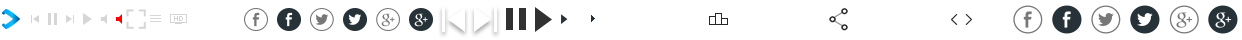
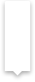
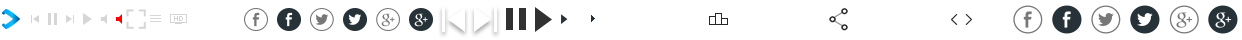

In [1]:
#練習
import requests 
import time 
from bs4 import BeautifulSoup 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 

ETtoday_url = "https://www.ettoday.net/news/focus/%E8%B2%A1%E7%B6%93/"

#打開留連結到東森新聞。
browser = webdriver.Chrome("/Users/Pacy/Downloads/chromedriver-2")
browser.get(ETtoday_url)

SCROLL_PAUSE_TIME = 1 

#以下適用selenium模擬下拉網頁動作讓網頁更新，讓所有新聞出現在網頁頁面上。
last_height = browser.execute_script("window.scrollTo(0,document.body.scrollHeight);")

while True:
    browser.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(2) 
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break 
    last_height = new_height
    
html = browser.page_source
soup = BeautifulSoup(html,"lxml")
print(soup)
#all_news = soup.find("div",attrs={"class":"block block_1 infinite_scroll"})
#news_block = all_news.find_all("div",attrs={"class":"piece clearfix"})

